# Business Understanding

## Introduction
Customer churn, the loss of paying subscribers, is a significant challenge for telecommunication companies like SyriaTel. It leads to reduced revenue, higher customer acquisition costs, and diminished brand loyalty. To proactively address churn and improve customer retention, SyriaTel requires a robust and data-driven approach.

## Problem Statement
This project aims to develop a customer churn prediction model using SyriaTel's customer data. The model will identify customers at high risk of churning, enabling SyriaTel to implement targeted retention strategies and minimize customer loss.

## Business Objectives
- **Reduce customer churn rate:** By predicting churn likelihood, SyriaTel can prioritize customer retention efforts towards high-risk customers.
- **Improve customer lifetime value:** Retaining existing customers is generally less expensive than acquiring new ones. The model will help SyriaTel focus on retaining valuable customers who contribute significantly to revenue.
- **Enhance customer satisfaction:** Proactive intervention for at-risk customers can address their needs and improve their overall experience, leading to higher satisfaction and loyalty.
- **Optimize marketing campaigns:** The model's insights can inform targeted marketing campaigns to re-engage customers considering leaving and offer them personalized incentives to stay.

## Data Description
The project will leverage a dataset containing historical customer information from SyriaTel's customer relationship management (CRM) system. This data is expected to include features such as customer demographics, account details, call usage patterns, and customer service interactions.

## Expected Benefits
A successful customer churn prediction model will provide SyriaTel with several benefits:
- **Data-driven decision making:** The model's insights will guide strategic decisions regarding customer retention programs and resource allocation.
- **Proactive customer engagement:** Early identification of churn risk allows SyriaTel to address customer concerns and prevent churn before it happens.
- **Targeted marketing efforts:** The model can help tailor marketing campaigns to specific customer segments, maximizing the effectiveness of retention efforts.
- **Improved customer experience:** By understanding customer behavior and addressing potential issues proactively, SyriaTel can enhance the overall customer experience and foster loyalty.

Developing a customer churn prediction model is a strategic investment for SyriaTel. By leveraging customer data and machine learning techniques, SyriaTel can gain valuable insights to reduce churn, improve customer retention, and ultimately achieve sustainable business growth.


## Data Understanding

### Dataset Overview
- The dataset contains historical customer information from SyriaTel's customer relationship management (CRM) system.
- Features include customer demographics, account details, call usage patterns, and customer service interactions.

### Structure and Features
- **Features:**
  - State of residence
  - Account length
  - Service plans (e.g., international plan, voice mail plan)
  - Call usage metrics (e.g., total minutes, number of calls)
  - Customer service interactions
  
### Potential Issues
- Missing values: Check for missing values in the dataset and decide on handling strategies.
- Outliers: Identify potential outliers in numerical features and determine if they need to be addressed.
- Data inconsistencies: Look for inconsistencies or errors in categorical features that might affect analysis.

### Data Preprocessing
- Cleaning the dataset to handle missing values, outliers, and inconsistencies.
- Performing necessary transformations such as encoding categorical variables and scaling numerical features.


Importing the necessary libraries

In [91]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

# Data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# Modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [92]:
# Define a custom pastel color palette
pastel_palette = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e',
                  '#2ecc71', '#f1c40f', '#1abc9c', '#e67e22', '#16a085']

# Set the color cycle to use the custom pastel color palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=pastel_palette)

Loading the data from the csv file

In [93]:
# Load the data from a CSV file
df = pd.read_csv("dataset/bigml.csv")

# Displaying the first  5 rows of the dataframe
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Checking for Missing Values

In [51]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Upon loading the dataset and examining its information using the `info()` method, it was observed that each column contains 3333 non-null entries. This indicates that there are no missing values present in the dataset.

In [45]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

To further confirm the absence of missing values, the `isnull().sum()` method was used, which returned 0 showing there were no missing values. 
With no missing values present, we can confidently proceed with further analysis and modeling.

In [47]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Explanatory Data Analysis

##### Visualisation of Numerical Features

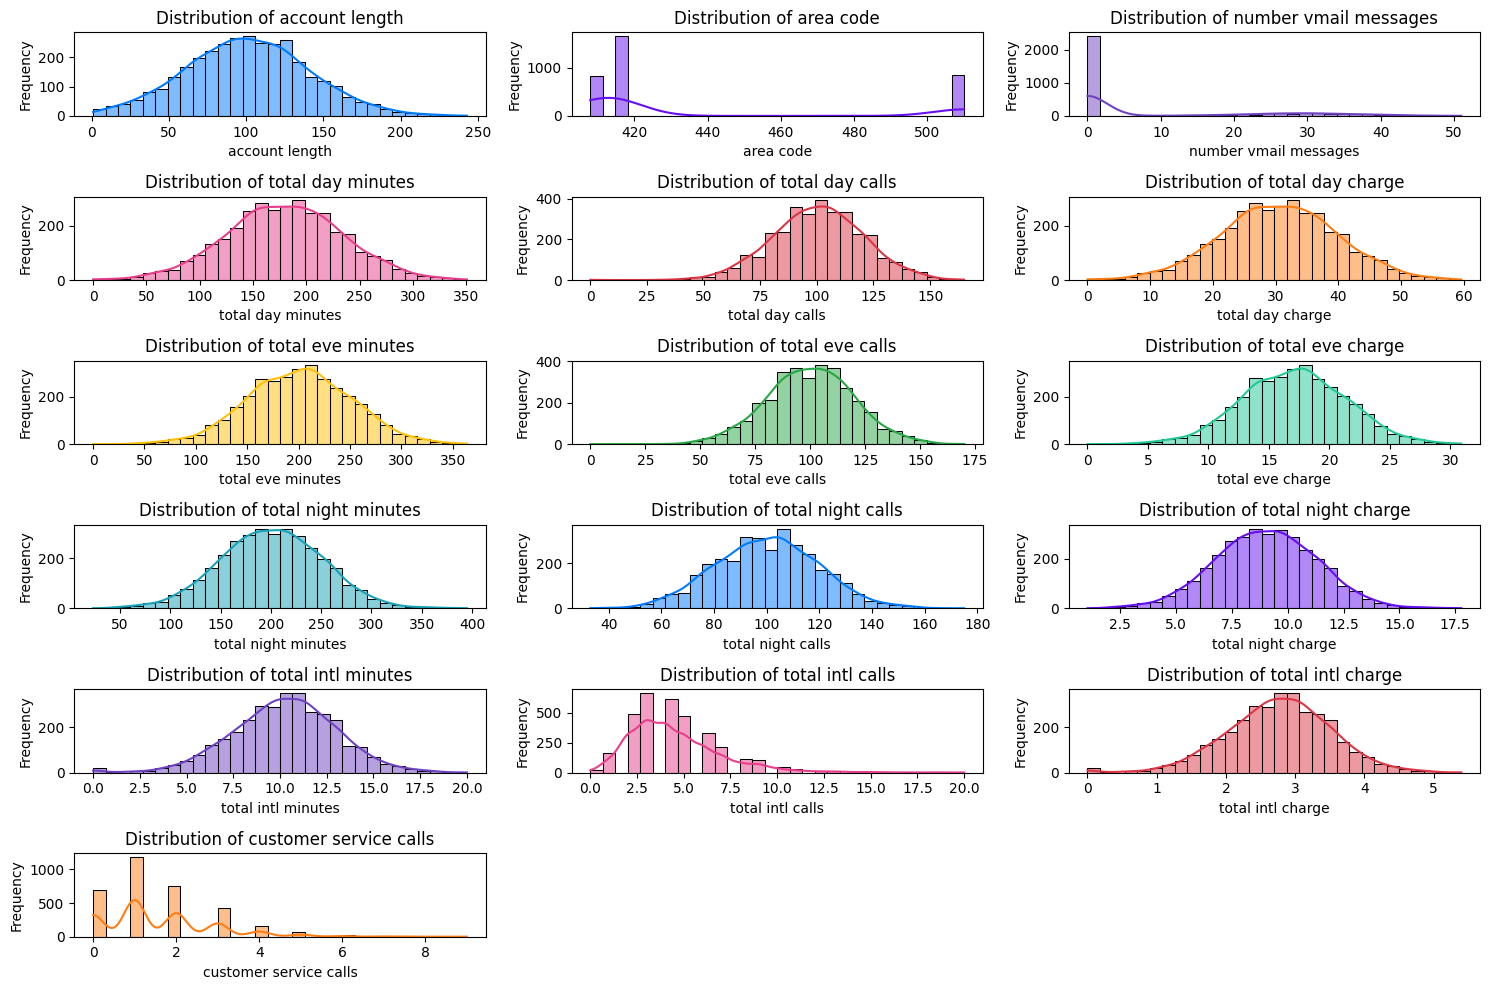

In [61]:
# Define the color palette
numerical_palette = ['#007bff', '#6610f2', '#6f42c1', '#e83e8c', '#dc3545',
                     '#fd7e14', '#ffc107', '#28a745', '#20c997', '#17a2b8']

# Calculate the number of rows and columns needed for subplots
num_features = len(numerical_features.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Visualize numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(data=df, x=column, kde=True, bins=30, color=numerical_palette[i % len(numerical_palette)])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Visualizing the numerical data revealed some interesting patterns. Customer tenure (account length) and call durations/charges across various time periods (day, evening, night, international) are right-skewed, suggesting most customers exhibit lower usage patterns. Total international calls might also lean towards higher call volumes for a smaller customer segment. Customer service calls show a multimodal distribution, indicating distinct groups with varying frequencies of contacting customer service. Exploring relationships between these features and potential outliers can provide further insights into customer behavior relevant to churn prediction.

##### Visualisation of Categorical Features

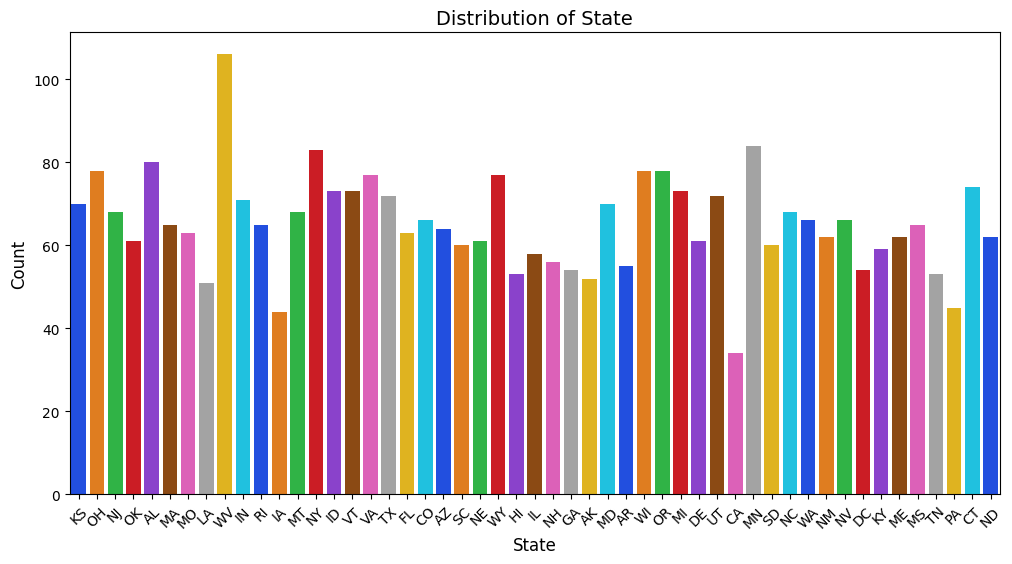

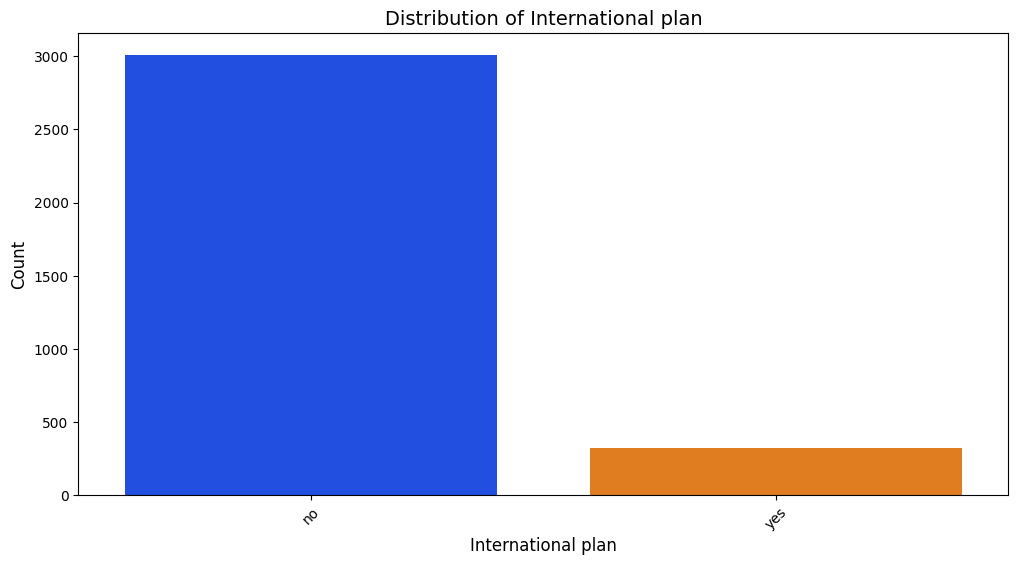

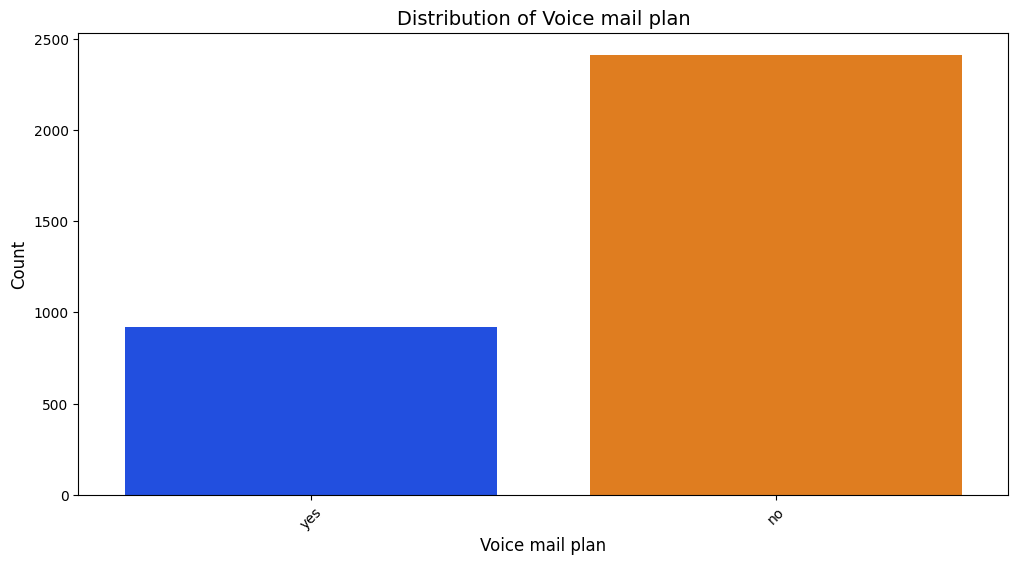

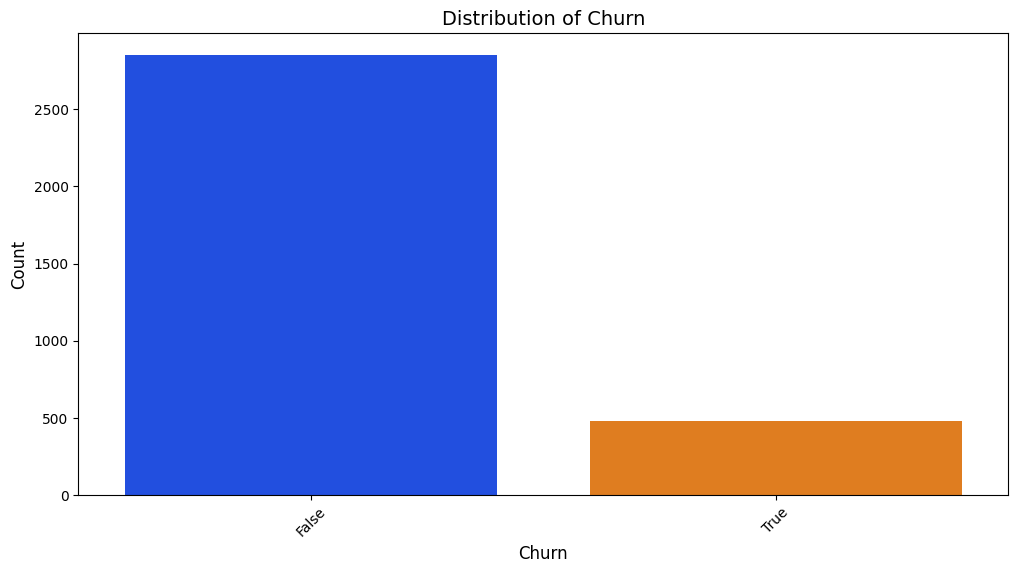

In [60]:
# Define a vibrant color palette
vibrant_palette = sns.color_palette("bright")

# Visualize categorical features using count plots
categorical_features = df.select_dtypes(include=['object', 'bool'])
for column in categorical_features.columns:
    if column == 'phone number':
        continue
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, palette=vibrant_palette)
    plt.title(f'Distribution of {column.capitalize()}', fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

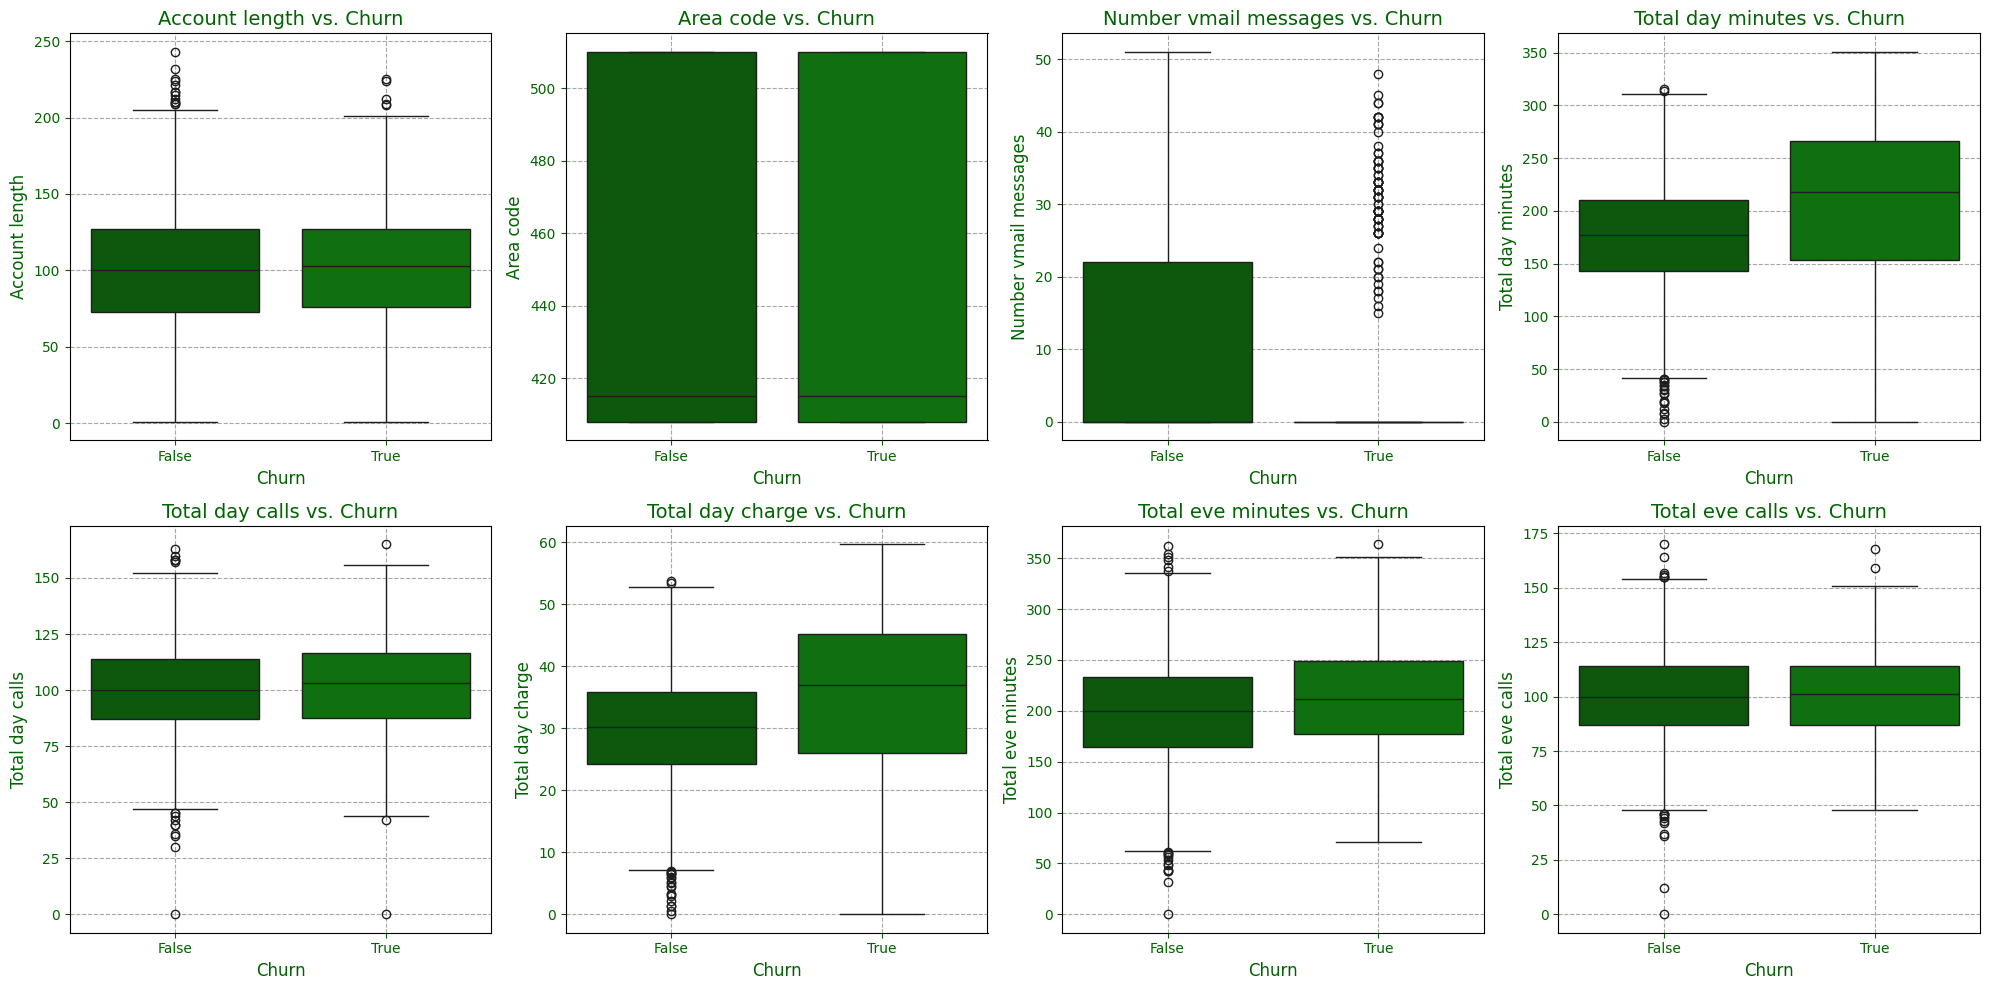

In [ ]:
# Define custom color palette
custom_palette = ['#006400', '#008000', '#228B22', '#32CD32', '#3CB371']

# Select the first 8 numerical features
numerical_features_subset = numerical_features.iloc[:, :8]

# Visualize numerical features vs. target variable (churn) in subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, column in enumerate(numerical_features_subset.columns):
    sns.boxplot(data=df, x='churn', y=column, ax=axes[i//4, i%4], palette=custom_palette)
    axes[i//4, i%4].set_title(f'{column.capitalize()} vs. Churn', fontsize=14, color='#006400')
    axes[i//4, i%4].set_xlabel('Churn', fontsize=12, color='#006400')
    axes[i//4, i%4].set_ylabel(column.capitalize(), fontsize=12, color='#006400')
    axes[i//4, i%4].tick_params(axis='x', labelsize=10, colors='#006400')
    axes[i//4, i%4].tick_params(axis='y', labelsize=10, colors='#006400')
    axes[i//4, i%4].grid(True, linestyle='--', alpha=0.7, color='gray')

plt.tight_layout()
plt.show()

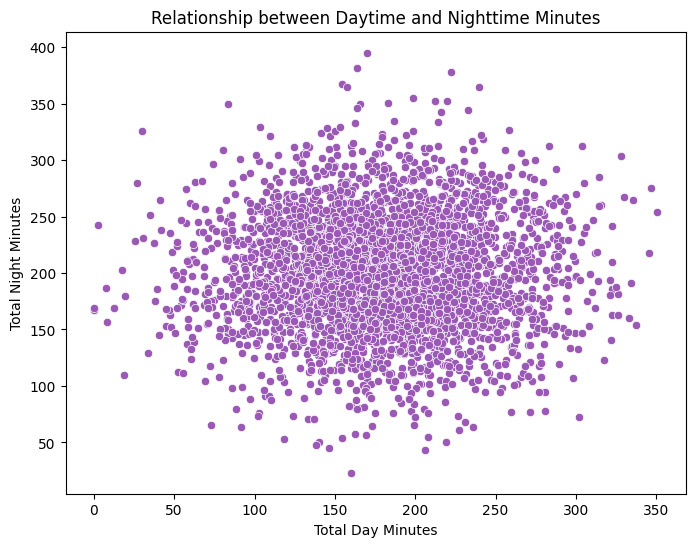

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Correlation coefficient: 0.004323366578518021


In [62]:
# Step 1: Select numerical variables
numerical_vars = ['total day minutes', 'total night minutes']

# Step 2: Visualize with scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total day minutes', y='total night minutes')
plt.title('Relationship between Daytime and Nighttime Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Night Minutes')
plt.show()

# Step 3: Calculate correlation coefficient
correlation = df['total day minutes'].corr(df['total night minutes'])
print(f'Correlation coefficient: {correlation}')

In [65]:
# Step 1: Select categorical variables
categorical_vars = ['state', 'churn']

# Step 2: Create contingency table
contingency_table = pd.crosstab(df['state'], df['churn'])
print(contingency_table)

# Step 3: Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

churn  False  True 
state              
AK        49      3
AL        72      8
AR        44     11
AZ        60      4
CA        25      9
CO        57      9
CT        62     12
DC        49      5
DE        52      9
FL        55      8
GA        46      8
HI        50      3
IA        41      3
ID        64      9
IL        53      5
IN        62      9
KS        57     13
KY        51      8
LA        47      4
MA        54     11
MD        53     17
ME        49     13
MI        57     16
MN        69     15
MO        56      7
MS        51     14
MT        54     14
NC        57     11
ND        56      6
NE        56      5
NH        47      9
NJ        50     18
NM        56      6
NV        52     14
NY        68     15
OH        68     10
OK        52      9
OR        67     11
PA        37      8
RI        59      6
SC        46     14
SD        52      8
TN        48      5
TX        54     18
UT        62     10
VA        72      5
VT        65      8
WA        52     14


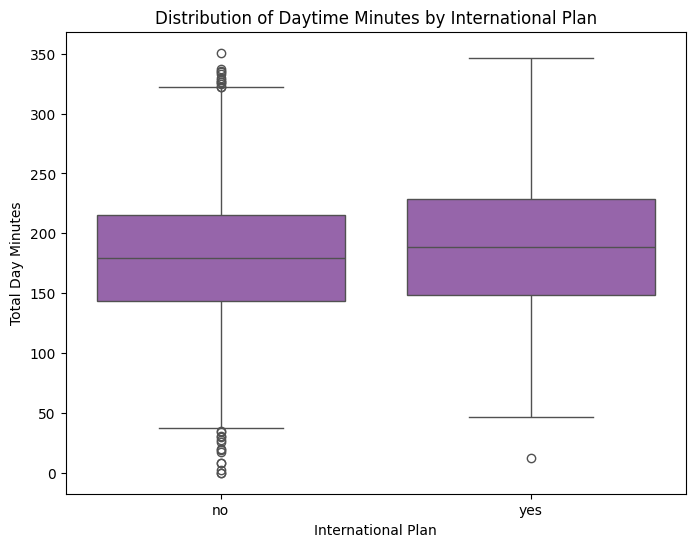

In [66]:
# Step 1: Select variables
numerical_var = 'total day minutes'
categorical_var = 'international plan'

# Step 2: Visualize with box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=categorical_var, y=numerical_var)
plt.title('Distribution of Daytime Minutes by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Total Day Minutes')
plt.show()

### Multivariate Analysis

The multivariate analysis involved examining the relationships between multiple variables simultaneously. In this study,how various features relate to the target variable (customer churn) when considered together was investigated.

A correlation matrix was utilized to uncover the correlations among different variables within the dataset.


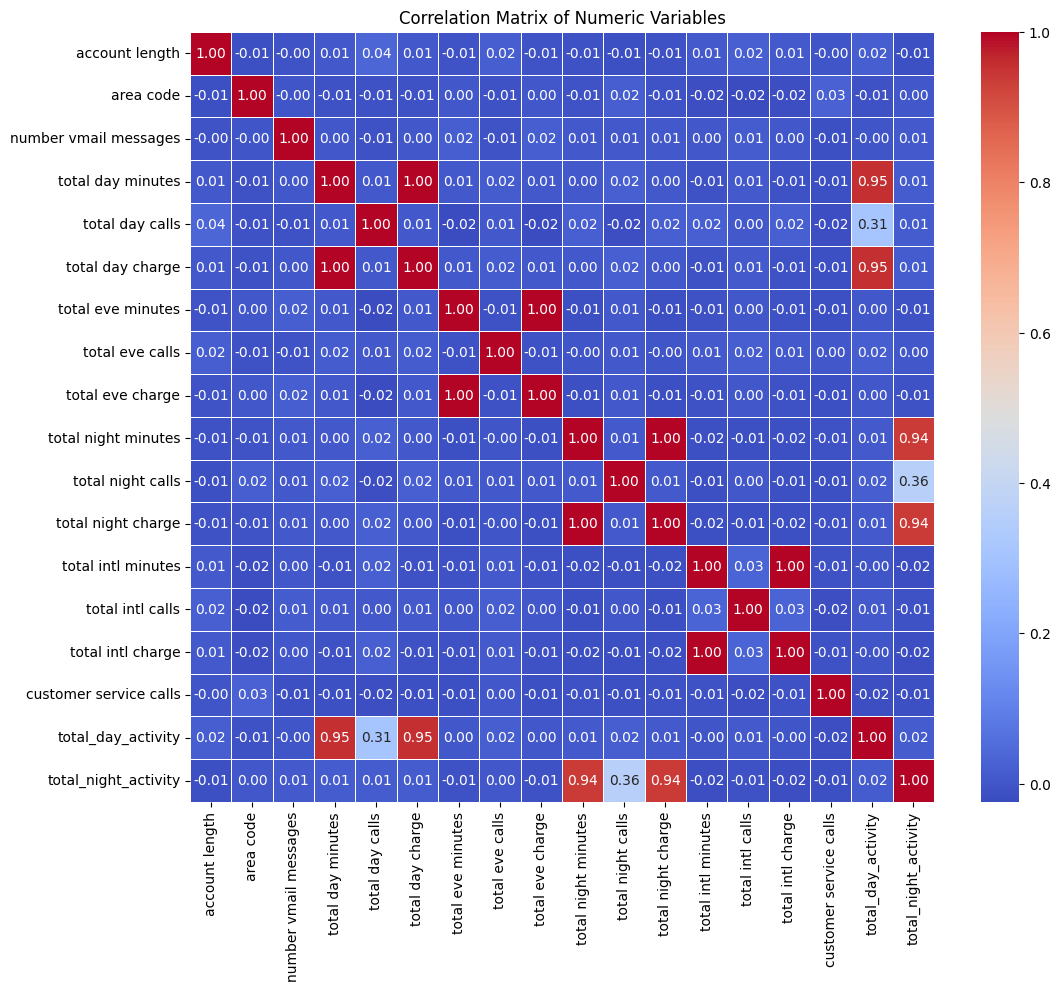

In [90]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Visualize correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

##### Key Takeaways from Correlation Matrix:

- **Daytime, Evening, and Night Calls:** Strong positive correlations exist between call minutes, number of calls, and charges within each time period (day, evening, night). This suggests customers who make more calls during a specific time also spend more on those calls during that time.

- **Account Length:** A weak positive correlation exists between account length and total call minutes (day, evening, night). This indicates that customers who have been with SyriaTel longer tend to make slightly more calls, but the effect is weak.

- **International Calls:** A moderate positive correlation is seen between total international minutes, number of calls, and charges. Customers who make more international calls tend to spend more on them.

- **Customer Service Calls:** This feature shows weak or no correlations with most others. The number of customer service calls seems unrelated to calling habits or account tenure.

## Feature Engineering

### Combining Related Features

Feature engineering aims to create new features that capture essential patterns and relationships in the data to enhance predictive model performance.
This step involves merging related features to streamline the feature space and reduce redundancy. Features related to call activity across different time periods (e.g., daytime, evening, night) are consolidated into composite features.

Composite features have the potential to enhance predictive model performance by capturing underlying patterns and reducing feature dimensionality. 

In [94]:
# Create composite features for call activity
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df['total_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

# Drop the original features
df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
          'total day calls', 'total eve calls', 'total night calls', 'total intl calls',
          'total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)


In [97]:
# Display the first few rows of the DataFrame after feature engineering
print(df.head())

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  customer service calls  churn  \
0             yes                     25                       1  False   
1             yes                     26                       1  False   
2              no                      0                       0  False   
3              no                      0                       2  False   
4              no                      0                       3  False   

   total_minutes  total_calls  total_charges  
0          717.2          303          75.56  
1          625.2          332     

## Data Preprocessing
### One-Hot Encoding

One-hot encoding is a technique used to convert categorical variables into a numerical format suitable for machine learning algorithms. It is particularly useful when dealing with categorical variables with multiple categories.

In [98]:
# Assuming X contains your dataset with categorical variables
X = df[['state', 'international plan', 'voice mail plan']]

# Perform one-hot encoding using pd.get_dummies()
X_encoded = pd.get_dummies(X, drop_first=True)

# Concatenate the encoded features with the original dataset
df_encoded = pd.concat([df.drop(columns=['state', 'international plan', 'voice mail plan']), X_encoded], axis=1)


### Scaling Numerical Features

Scaling numerical features is important for algorithms that are sensitive to feature scales, such as gradient descent-based algorithms and distance-based algorithms.

In [100]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['account length', 'area code', 'number vmail messages',
       'customer service calls', 'total_minutes', 'total_calls',
       'total_charges'],
      dtype='object')

In [101]:
# Assuming X contains your dataset with numerical features
numerical_columns = ['account length', 'area code', 'number vmail messages', 
                     'customer service calls', 'total_minutes', 'total_calls', 
                     'total_charges']  # List of numerical feature columns

X_numerical = df[numerical_columns]  # Select numerical features

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your numerical features
scaler.fit(X_numerical)

# Transform the numerical features using the fitted scaler
X_scaled = scaler.transform(X_numerical)

# Optionally, convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_columns)